# Using clusters

what is it?
- now that we have made our clusters, how do we use them?

what do we care? 
- to get some usefulness out of our supervised learning

## Clusters are about providing options and insight

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

# Show us!

Scenario: Analyzing our mall data and seeing how unsupervised learning can drive our data insights

In [1]:
#do the data things
import pandas as pd
import numpy as np

#visualize & stastisize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#prepore and model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#my creds
from env import get_db_url

## Acquire

In [2]:
#get my data
df = pd.read_sql('SELECT * FROM customers;', get_db_url('mall_customers'))
df = df.set_index('customer_id')

#see it
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Prepare

Since my dataset was so small, I made my validate and test dataframes smaller than normal
- this is probably too small to be utilized in the real world
- the tiny validate and test are just to show the steps of working through a split df

In [4]:
def train_validate_test_split(df, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df, test_size=0.05, random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.05, random_state=seed)
    return train, validate, test

In [5]:
def scale_my_data(train, validate, test, features):
    '''
    scale my data using minmaxscaler, input the features to scale
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[features])
    
    train_scaled = scaler.transform(train[features])
    validate_scaled = scaler.transform(validate[features])
    test_scaled = scaler.transform(test[features])

    train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=features)
    validate_scaled = pd.DataFrame(validate_scaled, index=validate.index, columns=features)
    test_scaled = pd.DataFrame(test_scaled, index=test.index, columns=features)
    
    return train_scaled, validate_scaled, test_scaled

In [6]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
#     df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return train, validate, test

In [7]:
#prep my data!
train, validate, test = prep_mall(df)

df: (200, 4)

train: (180, 4)
validate: (10, 4)
test: (10, 4)


In [8]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
53,Female,31,43,54
98,Female,27,60,50
198,Male,32,126,74
43,Male,48,39,36
160,Female,30,78,73


In [10]:
features_to_scale = ['age','annual_income','spending_score']

In [11]:
train_scaled, validate_scaled, test_scaled = scale_my_data(train, validate, test, features_to_scale)
train_scaled

,age,annual_income,spending_score
customer_id,,,
53,0.250000,0.229508,0.540816
98,0.173077,0.368852,0.500000
198,0.269231,0.909836,0.744898
43,0.576923,0.196721,0.357143
160,0.230769,0.516393,0.734694
...,...,...,...
27,0.519231,0.106557,0.316327
164,0.250000,0.540984,0.938776
193,0.288462,0.803279,0.071429


## Explore

We explored all the things!
- hypothesize
- visualize
- statisticize
- summarize

We found that age, annual_income, and spending score looked like were good canidates for clusters. 

We utilized the elbow method to determine the best number of clusters

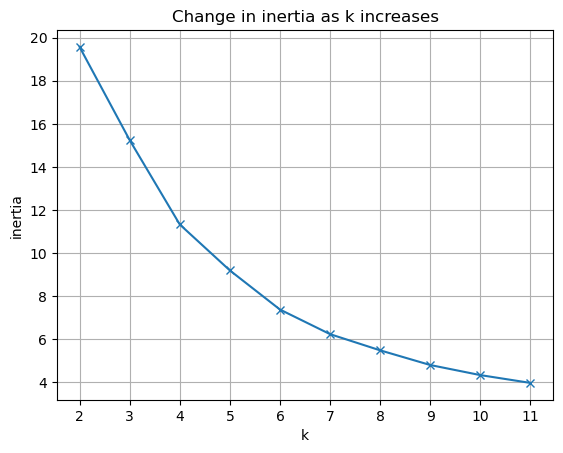

In [12]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=42, n_init=10).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

#### Move forward optimal cluster number (i choose 4)

In [13]:
#make it
kmeans = KMeans(n_clusters = 4, random_state=42, n_init=10)

#fit it
kmeans.fit(train_scaled)

#use it
kmeans.predict(train_scaled)

array([2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 3, 2, 3, 1, 3, 1, 2, 3, 2,
       0, 3, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 2, 0, 2, 0, 0, 3, 2, 0,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 3,
       0, 1, 1, 0, 1, 3, 1, 1, 1, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 3, 2, 3,
       0, 0, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 1, 0, 1, 3, 3, 2, 3, 0, 2, 2, 2, 1, 3, 2, 1, 1, 2, 1, 0, 3,
       1, 2, 3, 1, 1, 2, 2, 2, 1, 3, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0,
       3, 0, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 2, 0, 3, 1, 3, 1, 1, 0, 1, 1,
       0, 3, 1, 0], dtype=int32)

#### Now save all of the newly created clusters

In [14]:
# And assign the cluster number to a column on the dataframe
train_scaled["cluster"] = kmeans.predict(train_scaled)
train_scaled.head()

,age,annual_income,spending_score,cluster
customer_id,,,,
53,0.250000,0.229508,0.540816,2
98,0.173077,0.368852,0.500000,2
198,0.269231,0.909836,0.744898,0
43,0.576923,0.196721,0.357143,1
160,0.230769,0.516393,0.734694,0


## Yay clusters! What next?

- Step 1: Explore the clusters
- Step 2: Name the clusters
- Step 3: 
    - Option 1: Dimensionality reduction
    - Option 2: Treat cluster names as a new target variable
    - Option 3: Perform deeper EDA
    - Option 4: Make many models

### Step 1: Explore the clusters

see how they are similiar or different

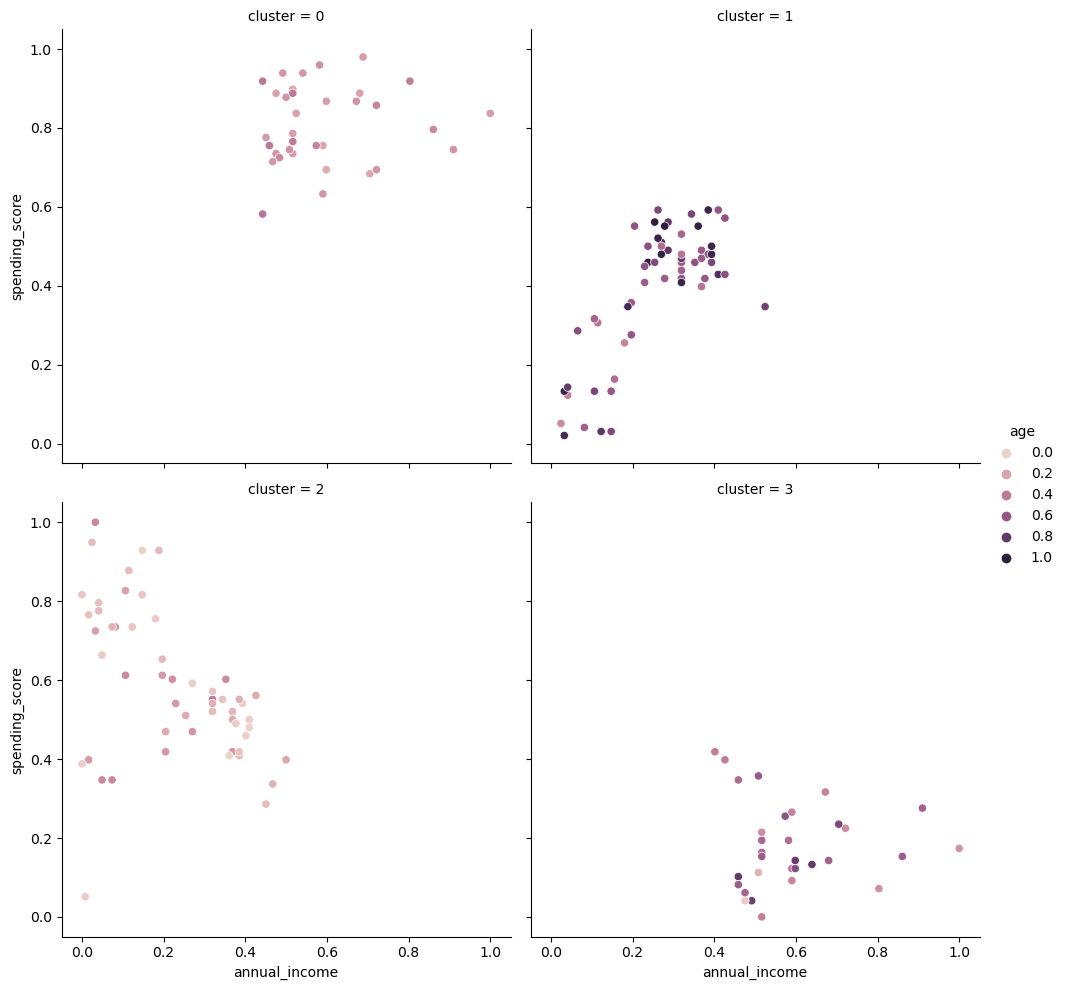

In [20]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=train_scaled,
           x='annual_income',
           y='spending_score',
           hue='age',
           col='cluster',
           col_wrap=2)
plt.show()

### Step 2: Name the clusters 

use natural, descriptive language

In [23]:
#rename using map
train['cluster'] = train_scaled.cluster.map({
    0:"young_ballers",
    1:"old_poor",
    2:"young_spending_above",
    3:"frugal"
})


In [24]:
train.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
53,Female,31,43,54,young_spending_above
98,Female,27,60,50,young_spending_above
198,Male,32,126,74,young_ballers
43,Male,48,39,36,old_poor
160,Female,30,78,73,young_ballers


### Step 3: Options

#### Let's say our mall dataset had more features in it, this will allow us to better utilize our clusters

In [25]:
train['transportation'] = np.random.choice(['personal_vehicle','walking','dropoff'],len(train),p=[.75,0.05,.2])
train['group_size'] = np.random.randint(1,10,len(train))
train['hair_color'] = np.random.choice(['black','brown','blonde','grey','other'],len(train))

In [26]:
train.head()

,gender,age,annual_income,spending_score,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,
53,Female,31,43,54,young_spending_above,personal_vehicle,3,blonde
98,Female,27,60,50,young_spending_above,personal_vehicle,7,black
198,Male,32,126,74,young_ballers,dropoff,7,grey
43,Male,48,39,36,old_poor,dropoff,5,blonde
160,Female,30,78,73,young_ballers,personal_vehicle,2,other


### Option 1: Use the clusters to simplify multiple other variables
- Since the cluster names make sense, we can use them instead of age, spending, and income
    - this potentially makes our features simplier and easier to explain
        - helpful for storytelling
    - this allows us to reduce features
        - likely help model performance (regression, classification)

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

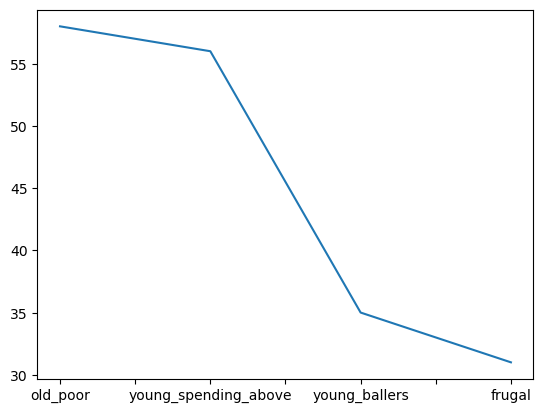

In [39]:
train.cluster.value_counts().plot().barh()

#### lets say we wanted to predict transportation

we will now build a classification model since we have a target

In [28]:
#define y_train
y_train = train.transportation
y_train.head()

customer_id
53     personal_vehicle
98     personal_vehicle
198             dropoff
43              dropoff
160    personal_vehicle
Name: transportation, dtype: object

without our clusters

In [30]:
#define X_train
X_train = train[['gender', 'age', 'annual_income', 'spending_score', 'group_size', 'hair_color']]
X_train.head()

,gender,age,annual_income,spending_score,group_size,hair_color
customer_id,,,,,,
53,Female,31,43,54,3,blonde
98,Female,27,60,50,7,black
198,Male,32,126,74,7,grey
43,Male,48,39,36,5,blonde
160,Female,30,78,73,2,other


with our clusters

In [31]:
#define X_train
X_train = train[['gender', 'cluster', 'group_size', 'hair_color']]
X_train.head()

,gender,cluster,group_size,hair_color
customer_id,,,,
53,Female,young_spending_above,3,blonde
98,Female,young_spending_above,7,black
198,Male,young_ballers,7,grey
43,Male,old_poor,5,blonde
160,Female,young_ballers,2,other


### Option 2: Use cluster names as a target variable to classify new data

In [40]:
train.head()

,gender,age,annual_income,spending_score,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,
53,Female,31,43,54,young_spending_above,personal_vehicle,3,blonde
98,Female,27,60,50,young_spending_above,personal_vehicle,7,black
198,Male,32,126,74,young_ballers,dropoff,7,grey
43,Male,48,39,36,old_poor,dropoff,5,blonde
160,Female,30,78,73,young_ballers,personal_vehicle,2,other


#### our new clusters can be our target variable

we can once again build a classification model using our new target variable

In [42]:
#define y_train
y_train = train.cluster
y_train.head()

customer_id
53     young_spending_above
98     young_spending_above
198           young_ballers
43                 old_poor
160           young_ballers
Name: cluster, dtype: object

#### our X_train can NOT include features that were used to calculate our target variable

In [46]:
#define X_train
x_train = train[['gender', 'transportation', 'group_size', 'hair_color']]
x_train.head()

,gender,transportation,group_size,hair_color
customer_id,,,,
53,Female,personal_vehicle,3,blonde
98,Female,personal_vehicle,7,black
198,Male,dropoff,7,grey
43,Male,dropoff,5,blonde
160,Female,personal_vehicle,2,other


### Option 3: Perform deeper EDA
Sometimes the identification of clusters gives us additional questions we need to ask.
- hypothesize
- visualize
- statisticize
- summarize

In [47]:
train.head()

,gender,age,annual_income,spending_score,cluster,transportation,group_size,hair_color
customer_id,,,,,,,,
53,Female,31,43,54,young_spending_above,personal_vehicle,3,blonde
98,Female,27,60,50,young_spending_above,personal_vehicle,7,black
198,Male,32,126,74,young_ballers,dropoff,7,grey
43,Male,48,39,36,old_poor,dropoff,5,blonde
160,Female,30,78,73,young_ballers,personal_vehicle,2,other


#### How do the cluster (customer) groups relate to hair color?

#### How do the customer groups compare to the group size?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'young_spending_above'),
  Text(1, 0, 'young_ballers'),
  Text(2, 0, 'old_poor'),
  Text(3, 0, 'frugal')])

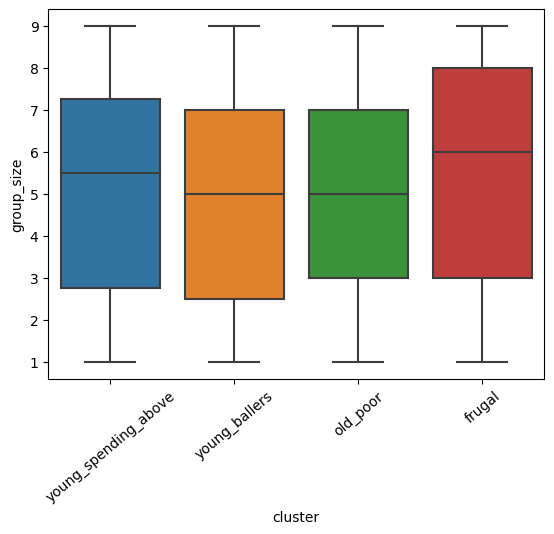

In [48]:
sns.boxplot(data=train, x='cluster', y='group_size')
plt.xticks(rotation=40)

verify with a stats test
write our conclusion!

### Option 4: Create a Many Models Approach

For each unique value in our cluster, build a separate model. Therefore, each cluser can have it's own model

In [49]:
train.cluster.value_counts()

old_poor                58
young_spending_above    56
young_ballers           35
frugal                  31
Name: cluster, dtype: int64

#### Model 1 -  Young people who are low income and spend a lot

In [52]:
to_drop = ['age', 'annual_income', 'spending_score', 'cluster']

In [54]:
train[train.cluster == 'young_spending_above'].drop(columns=to_drop).head()

,gender,transportation,group_size,hair_color
customer_id,,,,
53,Female,personal_vehicle,3,blonde
98,Female,personal_vehicle,7,black
88,Female,personal_vehicle,1,brown
100,Male,personal_vehicle,3,brown
40,Female,personal_vehicle,6,black


#### Model 2 - Old people who are low income and spend low amounts

In [55]:
train[train.cluster == 'old_poor'].drop(columns=to_drop).head()

,gender,transportation,group_size,hair_color
customer_id,,,,
43,Male,dropoff,5,blonde
117,Female,dropoff,3,black
90,Female,personal_vehicle,4,other
35,Female,dropoff,9,other
58,Male,personal_vehicle,9,blonde


#### Model 3 - Young people who make a lot and spend a lot

In [56]:
train[train.cluster == 'young_ballers'].drop(columns=to_drop).head()

,gender,transportation,group_size,hair_color
customer_id,,,,
198,Male,dropoff,7,grey
160,Female,personal_vehicle,2,other
156,Female,personal_vehicle,9,other
148,Female,walking,9,brown
168,Female,personal_vehicle,7,black


#### Model 4 - Old people who make a lot and spend a little

In [57]:
train[train.cluster == 'frugal'].drop(columns=to_drop).head()

,gender,transportation,group_size,hair_color
customer_id,,,,
151,Male,personal_vehicle,1,grey
165,Male,dropoff,1,black
177,Male,personal_vehicle,5,brown
191,Female,walking,8,other
169,Female,personal_vehicle,2,blonde
